<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/Cats_v_Dogs_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)


--2019-07-23 12:35:17--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   204MB/s    in 0.3s    

2019-07-23 12:35:17 (204 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



W0723 12:35:23.384770 140294722492288 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0723 12:35:23.617364 140294722492288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 14s - loss: 0.6926 - acc: 0.5135 - val_loss: 0.6714 - val_acc: 0.6270
Epoch 2/100
100/100 - 10s - loss: 0.6588 - acc: 0.6105 - val_loss: 0.6541 - val_acc: 0.5830
Epoch 3/100
100/100 - 10s - loss: 0.6176 - acc: 0.6690 - val_loss: 0.6028 - val_acc: 0.6720
Epoch 4/100
100/100 - 10s - loss: 0.5679 - acc: 0.7170 - val_loss: 0.5983 - val_acc: 0.6770
Epoch 5/100
100/100 - 10s - loss: 0.5399 - acc: 0.7320 - val_loss: 0.5803 - val_acc: 0.6930
Epoch 6/100
100/100 - 10s - loss: 0.5218 - acc: 0.7430 - val_loss: 0.5609 - val_acc: 0.7150
Epoch 7/100
100/100 - 10s - loss: 0.4960 - acc: 0.7545 - val_loss: 0.5573 - val_acc: 0.7070
Epoch 8/100
100/100 - 10s - loss: 0.4719 - acc: 0.7745 - val_loss: 0.5482 - val_acc: 0.7170
Epoch 9/100
100/100 - 10s - loss: 0.4514 - acc: 0.7805 - val_loss: 0.5830 - val_acc: 0.7030
Epoch 10/100
100/100 - 10s - loss: 0.4253 - acc: 0.7940 - val_loss: 0.5436 - val_acc: 0.

## Visualization of Training Accuracy and Validation Accuracy - Training and Validation Loss

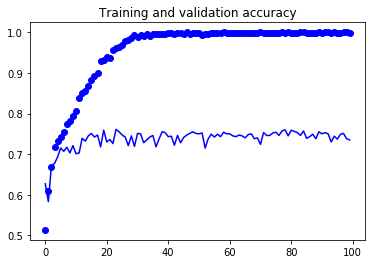

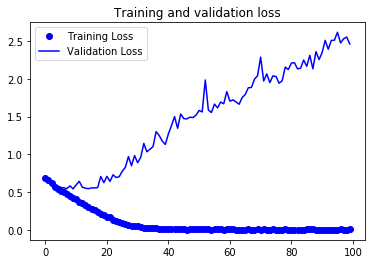

In [3]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Instead of the ImageGenerator just rescaling  the image, we also rotate and do other operations Updated to do image augmentation

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')


## Rescale test data

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

## # Flow training images in batches of 20 using train_datagen generator

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2000 images belonging to 2 classes.


## Flow validation images in batches of 20 using test_datagen generator

In [8]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [9]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 22s - loss: 1.3937 - acc: 0.6475 - val_loss: 0.5826 - val_acc: 0.7070
Epoch 2/100
100/100 - 20s - loss: 0.6004 - acc: 0.6950 - val_loss: 0.5258 - val_acc: 0.7490
Epoch 3/100
100/100 - 19s - loss: 0.5918 - acc: 0.6825 - val_loss: 0.5043 - val_acc: 0.7450
Epoch 4/100
100/100 - 19s - loss: 0.5709 - acc: 0.7075 - val_loss: 0.5019 - val_acc: 0.7450
Epoch 5/100
100/100 - 19s - loss: 0.5658 - acc: 0.7130 - val_loss: 0.4952 - val_acc: 0.7500
Epoch 6/100
100/100 - 20s - loss: 0.5415 - acc: 0.7250 - val_loss: 0.5168 - val_acc: 0.7450
Epoch 7/100
100/100 - 19s - loss: 0.5448 - acc: 0.7270 - val_loss: 0.4794 - val_acc: 0.7690
Epoch 8/100
100/100 - 19s - loss: 0.5376 - acc: 0.7300 - val_loss: 0.5067 - val_acc: 0.7430
Epoch 9/100
100/100 - 19s - loss: 0.5327 - acc: 0.7275 - val_loss: 0.4863 - val_acc: 0.7660
Epoch 10/100
100/100 - 19s - loss: 0.5336 - acc: 0.7345 - val_loss: 0.4956 - val_acc: 0.7570
Epoch 11/100
100/100 - 20s - loss: 0.5232 - acc: 0.7405 - val_loss: 0.4969 - va

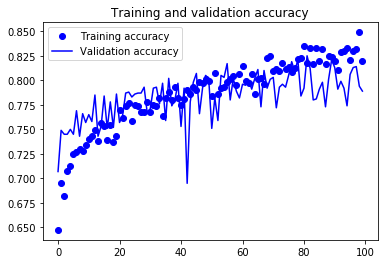

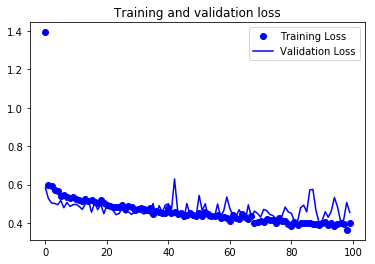

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()